# **Task1 (Simple Task)**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Resume.csv')

In [ ]:
data.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [ ]:
texts = data['Resume_str']
categories = data['Category']

In [ ]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(categories)

In [ ]:
# Text preprocessing and tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=200, padding='post')

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [ ]:
X_test.shape

(497, 200)

In [ ]:
model = Sequential([
    Embedding(input_dim=1000, output_dim=64, input_length=200),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(24, activation='softmax')  # 24 categories
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1)

Epoch 1/10
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.0604 - loss: 3.1368 - val_accuracy: 0.1087 - val_loss: 2.9469
Epoch 2/10
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step - accuracy: 0.1825 - loss: 2.7058 - val_accuracy: 0.1730 - val_loss: 2.7244
Epoch 3/10
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.2809 - loss: 2.2737 - val_accuracy: 0.1650 - val_loss: 2.8086
Epoch 4/10
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.3947 - loss: 1.9398 - val_accuracy: 0.1670 - val_loss: 2.8895
Epoch 5/10
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.5179 - loss: 1.5530 - val_accuracy: 0.1811 - val_loss: 3.1516
Epoch 6/10
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.6458 - loss: 1.2077 - val_accuracy: 0.1972 - val_loss: 3.3684
Epoch 7/10
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.7372 - loss: 0.9091 - val_accuracy: 0.1851 - val_loss: 3.6474
Epoch 8/10
1987/1987 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.7994 -

In [ ]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1953 - loss: 4.4500
Test Accuracy: 0.21


In [ ]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Get the predicted class

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


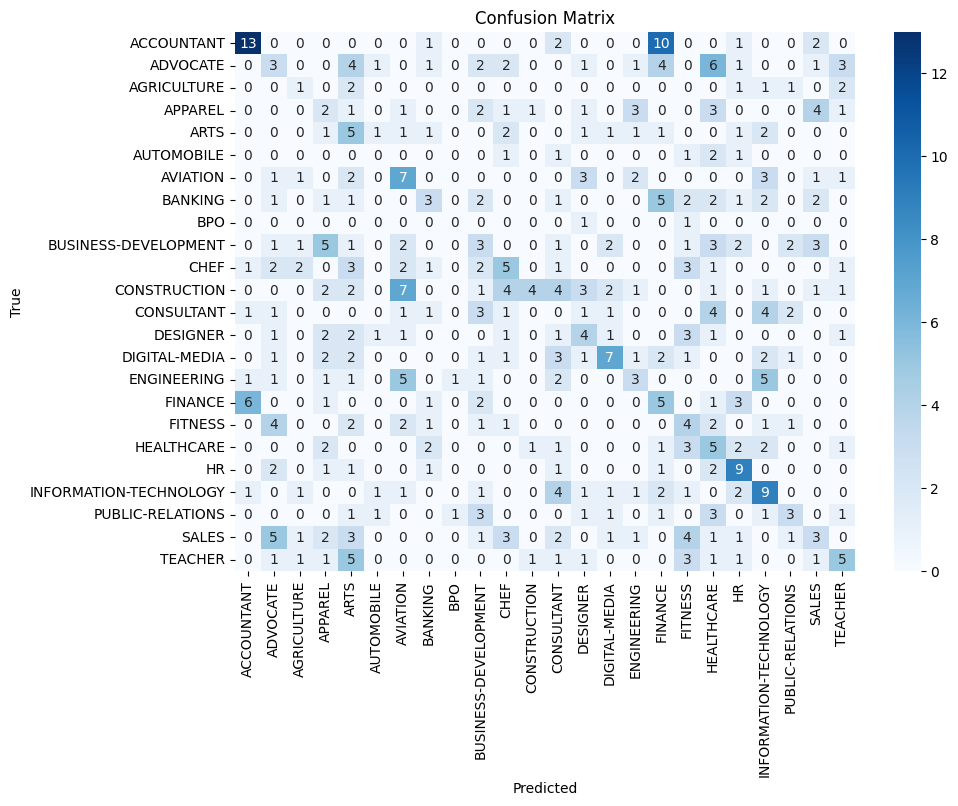

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()